In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# try:
data = pd.read_csv("spam.csv", encoding='latin-1')
# except UnicodeDecodeError:
#     try:
#         data = pd.read_csv("spam.csv", encoding='cp1252')
#     except UnicodeDecodeError:
#         print("Could not decode the file with 'latin-1' or 'cp1252'. Please check the file encoding.")

In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


**DATA CLEANING**

In [4]:
data.isnull().sum()

,0
v1,0
v2,0
Unnamed: 2,5522
Unnamed: 3,5560
Unnamed: 4,5566


In [5]:
data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [6]:
data.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)

In [7]:
data.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
from sklearn.preprocessing import LabelEncoder
en= LabelEncoder()
data['target']=en.fit_transform(data['target'])
# ham=0
# spam=1

In [9]:
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
data.duplicated().sum()

np.int64(403)

In [11]:
data=data.drop_duplicates(keep='first')

In [12]:
data.shape

(5169, 2)

**DATA PROCESSING**

In [13]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

ps = PorterStemmer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [14]:
from string import punctuation
def transformed_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)

  y=[]

  for i in text:
    if i.isalnum():
      y.append(i)

  text=y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words("english") and i not in string.punctuation:
      y.append(i)

  text=y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))


  return " ".join(y)

In [15]:
data["tranformed_text"]= data["text"].apply(transformed_text)

**MODEL BUILDING**

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=3000)
input=tfidf.fit_transform(data["tranformed_text"]).toarray()

In [17]:
input.shape

(5169, 3000)

In [43]:
output=data["target"]

In [50]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(input, output, test_size=0.2, random_state=2)

In [51]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB,BernoulliNB
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()


In [52]:
gnb.fit(x_train, y_train)
y_score1=gnb.score(x_test,y_test)*100
y_pred1=gnb.predict(x_test)

mnb.fit(x_train, y_train)
y_score2=mnb.score(x_test,y_test)*100
y_pred2=mnb.predict(x_test)

bnb.fit(x_train, y_train)
y_score3=bnb.score(x_test,y_test)*100
y_pred3=bnb.predict(x_test)

print(y_score1, y_score2, y_score3)



87.4274661508704 97.09864603481626 98.35589941972921


In [53]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score

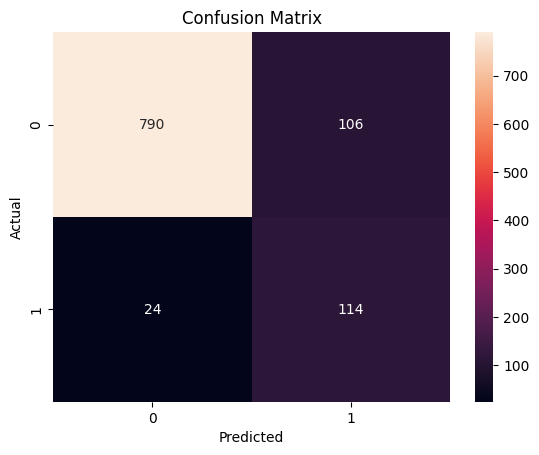

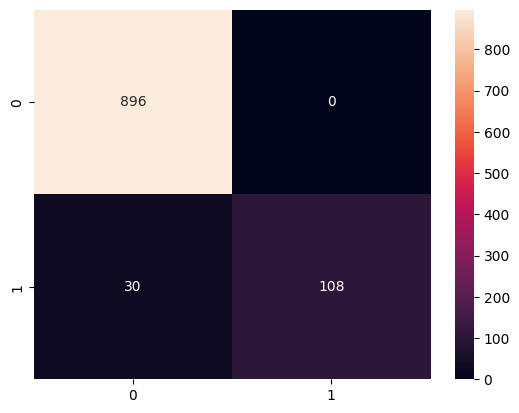

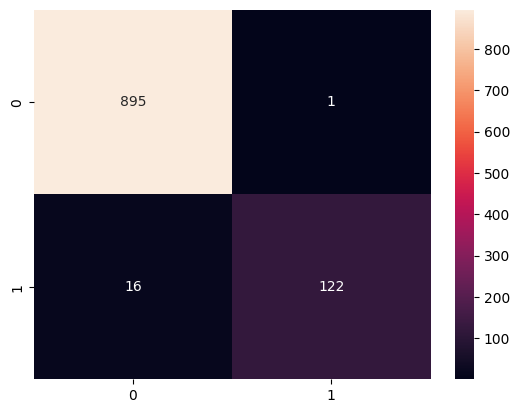

In [23]:
sns.heatmap(confusion_matrix(y_test,y_pred1) ,annot =True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


sns.heatmap(confusion_matrix(y_test,y_pred2) ,annot =True, fmt='d')
plt.show()

sns.heatmap(confusion_matrix(y_test,y_pred3) ,annot =True, fmt='d')
plt.show()


In [24]:
confusion_matrix(y_test,y_pred3)

array([[895,   1],
       [ 16, 122]])

In [27]:
print(precision_score(y_test,y_pred1)*100)
print(precision_score(y_test,y_pred2)*100)
print(precision_score(y_test,y_pred3)*100)

51.81818181818182
100.0
99.1869918699187


In [55]:
print(accuracy_score(y_test,y_pred1)*100)
print(accuracy_score(y_test,y_pred2)*100)
print(accuracy_score(y_test,y_pred3)*100)

87.4274661508704
97.09864603481626
98.35589941972921


In [24]:
# here we will be using mnb
# with accuracy 97 and precision 100

**HYPERPARAMETER TUNNING**

In [57]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [64]:
param_grid={
    "alpha": [0.01, 0.1, 0.5, 1.0, 2.0, 5.0]
}

In [65]:
gs=GridSearchCV(MultinomialNB(), param_grid=param_grid, cv=6)
gs.fit(x_train, y_train)

GridSearchCV(cv=6, estimator=MultinomialNB(),
             param_grid={'alpha': [0.01, 0.1, 0.5, 1.0, 2.0, 5.0]})

In [67]:
gs.best_params_

{'alpha': 0.1}

In [68]:
gs.best_score_

np.float64(0.9806535411539513)

In [79]:
mnb=MultinomialNB(alpha=0.1)
mnb.fit(x_train,y_train)
y_predF=mnb.predict(x_test)
print(accuracy_score(y_test,y_predF))
print(precision_score(y_test,y_predF))

0.9806576402321083
0.9682539682539683


In [80]:
rd= RandomizedSearchCV(MultinomialNB(), param_distributions=param_grid, n_iter=20)
rd.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 6 is smaller than n_iter=20. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(estimator=MultinomialNB(), n_iter=20,
                   param_distributions={'alpha': [0.01, 0.1, 0.5, 1.0, 2.0,
                                                  5.0]})

In [81]:
rd.best_params_

{'alpha': 0.1}

In [ ]:
# no changes needed

**Deployment**

In [82]:
import pickle

pickle.dump(tfidf, open("vectorizer.pkl", "wb"))
pickle.dump(mnb, open("model.pkl", "wb"))

In [84]:
!pip freeze > requirements.txt